## CASTRO samples for 4 dimensional problem or subproblem 1 of 9 dimensional problem

This Notebook runs the CASTRO algorithm for generating feasible samples for the 4 dimensional problem or subproblem 1 of the 9 dimensional problem.

As components we have the polymer PA56, phytic acid, an amino-based component and a metallic component.

It contains the following steps:
1. Initialization
2. CASTRO samples
3. Sample selection by checking distance from experimental data and illustrations
4. Distribution plots
5. Write results to csv files
6. Show results


written by Christina Schenk

last updated on 05/07/2024

tested on Christina's M1 Mac

#### Import python packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from pathlib import Path  
from sklearn.preprocessing import StandardScaler
import sys

sys.path.append('..')
from src.conditionedSampling import *
from src.plot import *
from src.utils import *

### **1. Initialization**

##### Specify the design space: lower and upper bounds for x and y, dim etc.

In [2]:
#Lower and upper bounds for x and y:
#polymer:
PA56_lb = 0.8
PA56_ub = 1.0
#phytic acid:
PhA_lb = 0.0
PhA_ub = 0.05
#amino-based acids:
am_lb = 0.0
am_ub = 0.1
#metallic-based acids:
met_lb = 0.0
met_ub = 0.14

x1_lb = PA56_lb
x1_ub = PA56_ub

x2_lb = PhA_lb
x2_ub = PhA_ub

x3_lb = am_lb
x3_ub = am_ub

x4_lb = met_lb
x4_ub = met_ub

#dimension of design space:
dim = 4
bounds = [[x1_lb,x1_ub],[x2_lb,x2_ub], [x3_lb,x3_ub], [x4_lb,x4_ub]]

#number of samples
n_samp = 100

### **2. CASTRO samples** 
#### Collect samples for all permutations of bounds (all selected or subset of samples selected with checking for distance)

#### Calculate all permutations of bounds

In [3]:
all_perms = []
all_perms += permutations(range(dim))

#### Define algorithm parameters

In [4]:
#dimension of design space:
#dim = 4
tot_samp = 144
prev_bounds = [[x1_lb,x1_ub], [x2_lb,x2_ub], [x3_lb,x3_ub], [x4_lb,x4_ub]]
n_samp = tot_samp//len(all_perms)
tol_norm = 5e-1
num_select = 4
all_select = True
max_rej = n_samp//2

In [5]:
all_val_samples, all_val_samples_mdu = sample_with_bound_permutations(prev_bounds=prev_bounds, n_samp=n_samp, tol_norm=tol_norm, all_select=all_select, num_select=num_select, max_rej=max_rej, dim=dim)

NUM_METH 0 running
###################New Method#######################
NUM_METH 1 running


### **3. Sample selection by checking distance from experimental data and illustration**

#### Import data and format

In [6]:
filename = './data/Bank_Data-2808_mod_corrected.csv'#Bank_Data_mod_clean.csv'
df = pd.read_csv(filename, sep=';', decimal=",")
#df = df.replace(',','.', regex=True)
df = df.div(100.)
print(df, len(df))
data_array = np.zeros((len(df),dim))
data_array = np.column_stack((df['PA-56'].to_numpy(), df['PhA'], df['am-based'], df['met-based']))


    PA-56    HNT    PhA   CS   BN   THAM   CaBO   ZnBO    Mel  met-based  \
0    1.00  0.000  0.000  0.0  0.0  0.000  0.000  0.000  0.000      0.000   
1    1.00  0.000  0.000  0.0  0.0  0.000  0.000  0.000  0.000      0.000   
2    0.95  0.000  0.017  0.0  0.0  0.033  0.000  0.000  0.000      0.000   
3    0.95  0.000  0.017  0.0  0.0  0.017  0.000  0.017  0.000      0.017   
4    0.95  0.000  0.017  0.0  0.0  0.017  0.017  0.000  0.000      0.017   
..    ...    ...    ...  ...  ...    ...    ...    ...    ...        ...   
70   0.90  0.050  0.000  0.0  0.0  0.000  0.000  0.000  0.050      0.050   
71   0.97  0.020  0.000  0.0  0.0  0.000  0.000  0.000  0.010      0.020   
72   0.95  0.033  0.000  0.0  0.0  0.000  0.000  0.000  0.017      0.033   
73   0.93  0.047  0.000  0.0  0.0  0.000  0.000  0.000  0.023      0.047   
74   0.90  0.067  0.000  0.0  0.0  0.000  0.000  0.000  0.033      0.067   

    am-based  
0      0.000  
1      0.000  
2      0.033  
3      0.017  
4      0.017

#### Standardize data

In [7]:
scaler = StandardScaler().fit(data_array)
data_scaled = scaler.transform(data_array)
scaler2 = StandardScaler().fit(all_val_samples)
all_val_samples_scaled = scaler2.transform(all_val_samples)
scaler3 = StandardScaler().fit(all_val_samples_mdu)
all_val_samples_mdu_scaled = scaler3.transform(all_val_samples_mdu)

In [8]:
print(len(all_val_samples_mdu))
print(len(all_val_samples))

170
88


#### Transform with PCA and plot in two dimensions for both LHS(MDU) samples and Data
#### Check variance ratios

In [9]:
pca = PCA(n_components=2)
Xt1 = pca.fit_transform(data_scaled)
print("variance ratio data", pca.explained_variance_ratio_)
print("variance ratio norm data", np.linalg.norm(pca.explained_variance_ratio_))
print(pca.components_)
Xt2 = pca.fit_transform(all_val_samples_scaled)
print("variance ratio lhs", pca.explained_variance_ratio_)
print("variance ratio norm lhs", np.linalg.norm(pca.explained_variance_ratio_))
print(pca.components_)
Xt3 = pca.fit_transform(all_val_samples_mdu_scaled)
print("variance ratio lhsmdu", pca.explained_variance_ratio_)
print("variance ratio norm lhsmdu", np.linalg.norm(pca.explained_variance_ratio_))
print(pca.components_)

variance ratio data [0.43079055 0.30611911]
variance ratio norm data 0.5284783866299462
[[ 0.72137182 -0.38600935 -0.31579681 -0.48051207]
 [-0.05604267 -0.41093141 -0.62786664  0.65861831]]
variance ratio lhs [0.49505849 0.29828182]
variance ratio norm lhs 0.5779748753653476
[[ 0.70390086 -0.37307022 -0.3800208  -0.47002807]
 [-0.06915163 -0.34249779 -0.63919805  0.68508333]]
variance ratio lhsmdu [0.46914915 0.2898664 ]
variance ratio norm lhsmdu 0.5514738931014326
[[ 0.72768611 -0.26246584 -0.3196987  -0.54715386]
 [-0.03549332  0.23498492  0.76050325 -0.60428232]]


#### Scatterplot for reduced 2 dimensional PCA points

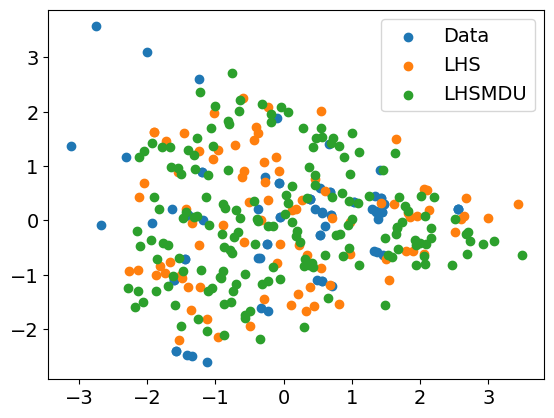

In [10]:
plot_dimred_2dims_both_methods(Xt1, Xt2, Xt3)

#### Select subset of samples that varies the most in terms of distance from the already collected data

In [11]:
tol = 1e-5
tol2 = 1e-5
des_n_samp = 90

tol_samples, tol_samples_LHSMDU, tol_samples_unscaled, tol_samples_LHSMDU_unscaled = select_samples_diff_from_data(exp_data=data_array, samples_LHS=all_val_samples, samples_LHSMDU=all_val_samples_mdu, des_n_samp = des_n_samp, tol = tol, tol2 = tol2)


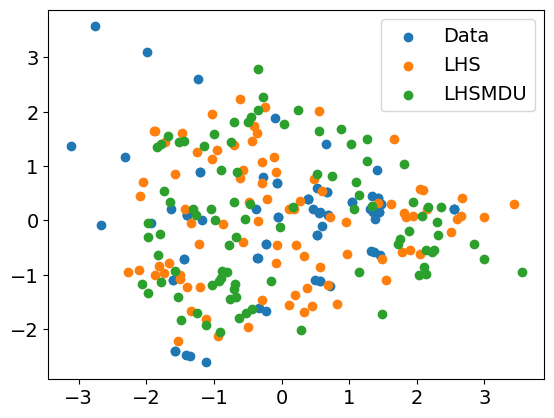

In [12]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
lhs_samples_pca = pca.fit_transform(tol_samples)
lhsmdu_samples_pca = pca.fit_transform(tol_samples_LHSMDU)

plot_dimred_2dims_both_methods(data_pca, lhs_samples_pca, lhsmdu_samples_pca)

#### Test whether all selected samples are feasible

In [13]:
for i in range(len(tol_samples_unscaled)):
    for j in range(dim):
        if tol_samples_unscaled[i,j]<prev_bounds[j][0] or tol_samples_unscaled[i,j]>prev_bounds[j][1]:
            print("not feasible", tol_samples_unscaled[i,:])
print("-------------------")
for i in range(len(tol_samples_LHSMDU_unscaled)):
    for j in range(dim):
        if tol_samples_LHSMDU_unscaled[i,j]<prev_bounds[j][0] or tol_samples_LHSMDU_unscaled[i,j]>prev_bounds[j][1]:
            print("not feasible", tol_samples_LHSMDU_unscaled[i,:])

-------------------


 ### **4. Distribution plots**

#### Distribution plots of scaled data

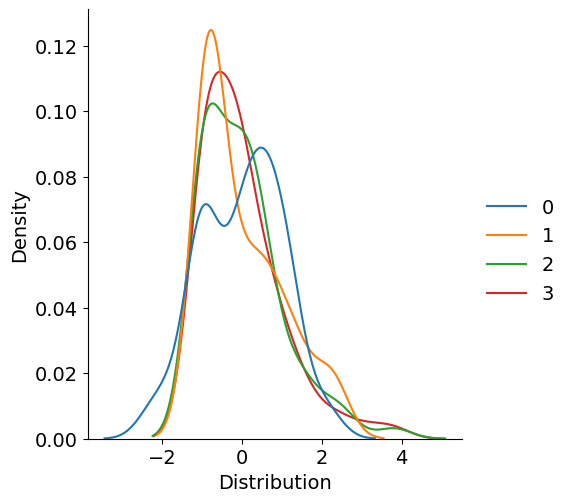

In [14]:
distplot_samples(data_scaled)

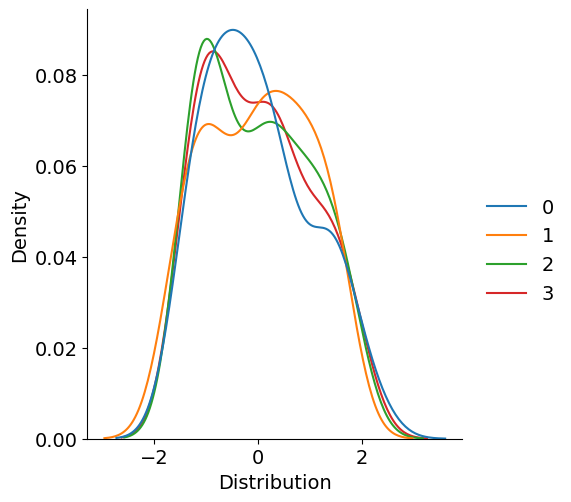

In [15]:
distplot_samples(all_val_samples_scaled)

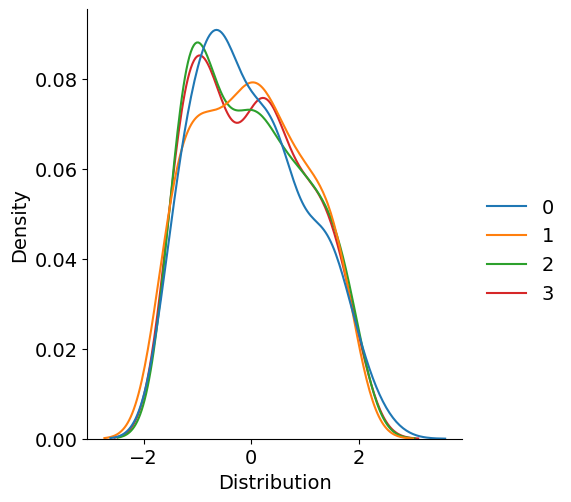

In [16]:
distplot_samples(all_val_samples_mdu_scaled)

#### Distribution subplots of scaled data

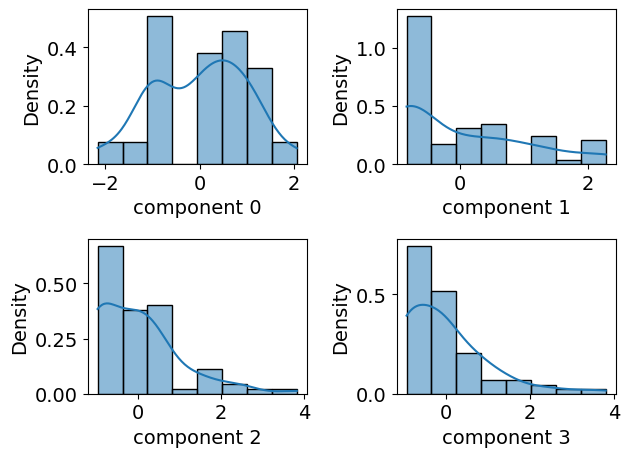

In [17]:
box_kdeplot_samples(data_scaled)

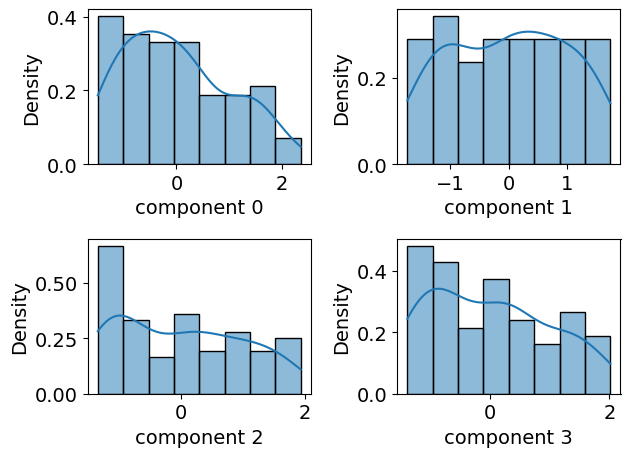

In [18]:
box_kdeplot_samples(all_val_samples_scaled)

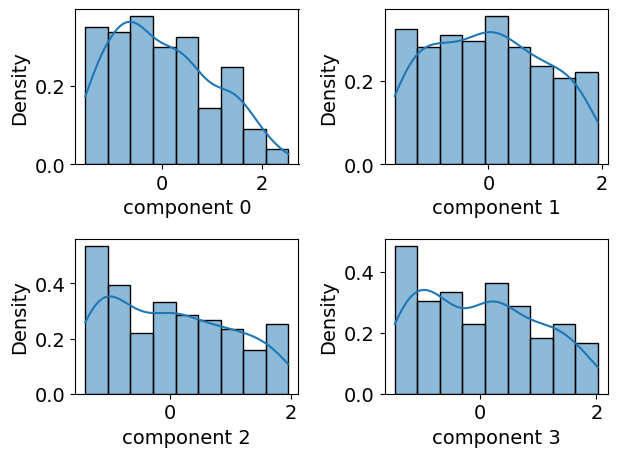

In [19]:
box_kdeplot_samples(all_val_samples_mdu_scaled)

In [20]:
print("variance data", pd.DataFrame(data_scaled).var(axis='index').to_numpy())
print("variance norm data", np.linalg.norm(pd.DataFrame(data_scaled).var(axis='index').to_numpy()))
print("variance lhs", pd.DataFrame(all_val_samples_scaled).var(axis='index').to_numpy())
print("variance norm lhs", np.linalg.norm(pd.DataFrame(all_val_samples_scaled).var(axis='index').to_numpy()))
print("variance lhsmdu", pd.DataFrame(all_val_samples_mdu_scaled).var(axis='index').to_numpy())
print("variance norm lhsmdu", np.linalg.norm(pd.DataFrame(all_val_samples_mdu_scaled).var(axis='index').to_numpy()))

variance data [1.01351351 1.01351351 1.01351351 1.01351351]
variance norm data 2.0270270270270285
variance lhs [1.01149425 1.01149425 1.01149425 1.01149425]
variance norm lhs 2.0229885057471266
variance lhsmdu [1.00591716 1.00591716 1.00591716 1.00591716]
variance norm lhsmdu 2.0118343195266277


#### Distribution plots of unscaled data:

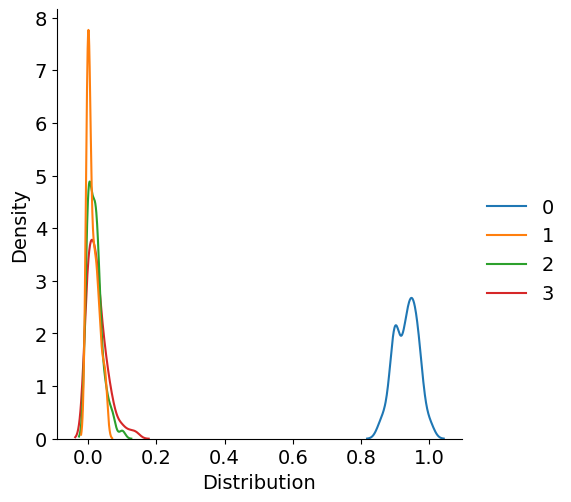

In [21]:
distplot_samples(data_array)

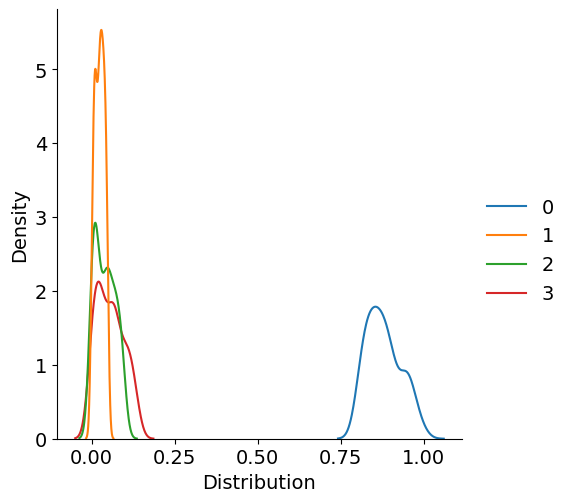

In [22]:
distplot_samples(all_val_samples)

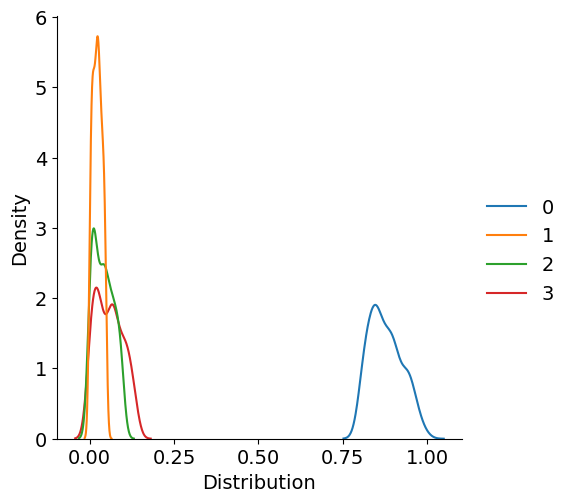

In [23]:
distplot_samples(all_val_samples_mdu)

#### Distribution subplots of unscaled data

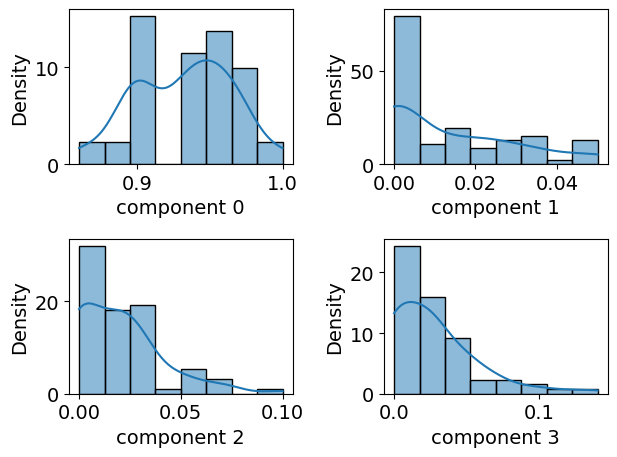

In [24]:
box_kdeplot_samples(data_array)

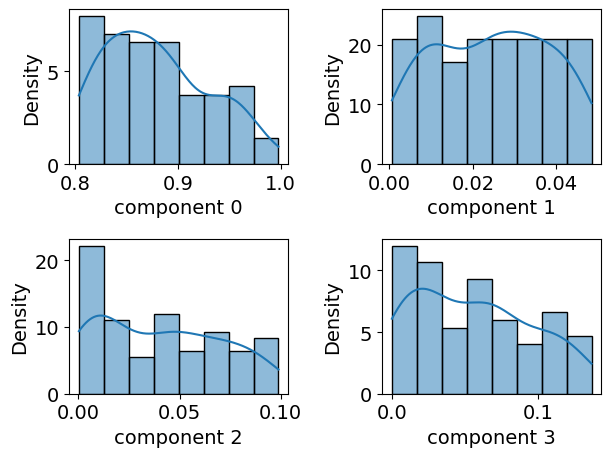

In [25]:
box_kdeplot_samples(all_val_samples)

In [26]:
for i in range(len(all_val_samples)):
    if all_val_samples[i,1]>0.05:
        print(i)

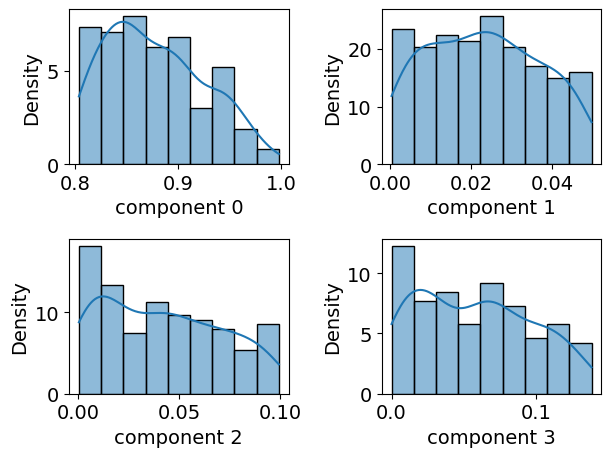

In [27]:
box_kdeplot_samples(all_val_samples_mdu)

In [28]:
print("variance data", pd.DataFrame(data_array).var(axis='index').to_numpy())
print("variance norm data", np.linalg.norm(pd.DataFrame(data_array).var(axis='index').to_numpy()))
print("variance lhs", pd.DataFrame(all_val_samples).var(axis='index').to_numpy())
print("variance norm lhs", np.linalg.norm(pd.DataFrame(all_val_samples).var(axis='index').to_numpy()))
print("variance lhsmdu", pd.DataFrame(all_val_samples_mdu).var(axis='index').to_numpy())
print("variance norm lhsmdu", np.linalg.norm(pd.DataFrame(all_val_samples_mdu).var(axis='index').to_numpy()))

variance data [0.00111723 0.00026141 0.0004443  0.00088963]
variance norm data 0.0015183436611557698
variance lhs [0.00256316 0.00019346 0.00091623 0.00162456]
variance norm lhs 0.003175826277937865
variance lhsmdu [0.00229319 0.00019273 0.00087279 0.00158136]
variance norm lhsmdu 0.002925464543657976


#### Distribution plots of scaled reduced data

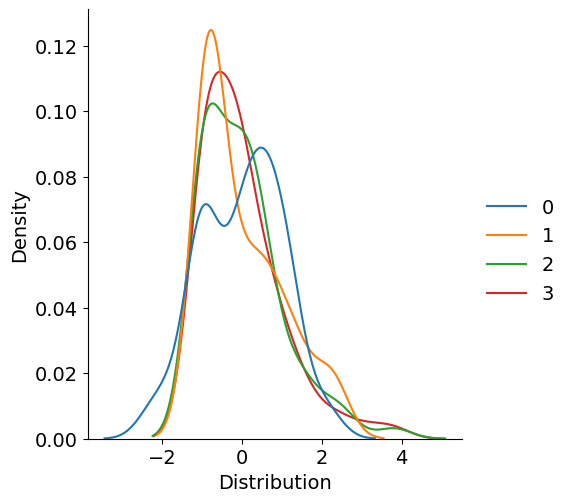

In [29]:
distplot_samples(data_scaled)

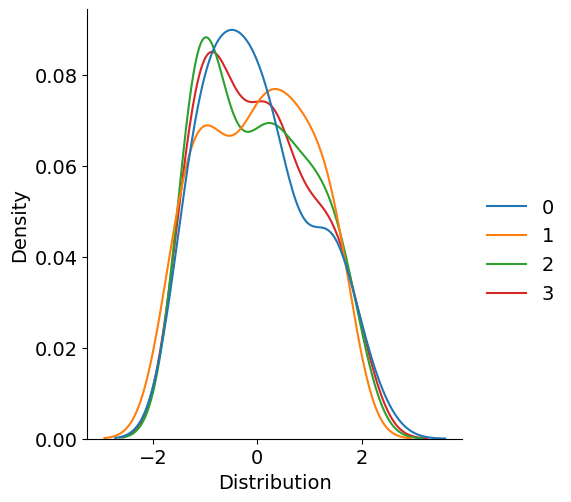

In [30]:
distplot_samples(tol_samples)

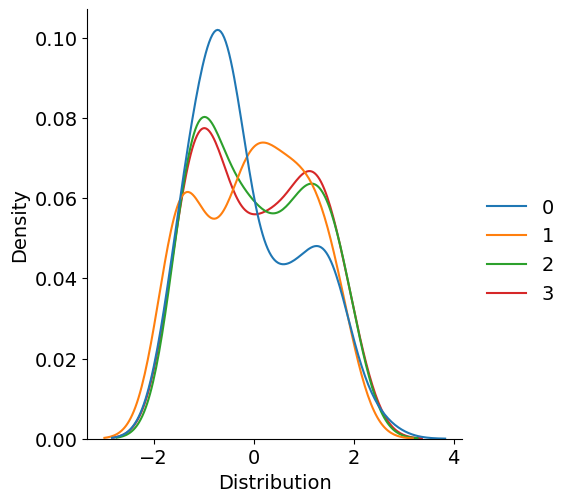

In [31]:
distplot_samples(tol_samples_LHSMDU)

#### Distribution subplots of scaled reduced data

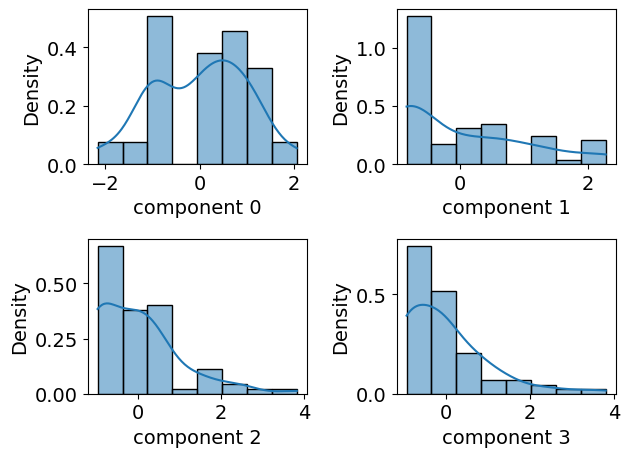

In [32]:
box_kdeplot_samples(data_scaled)

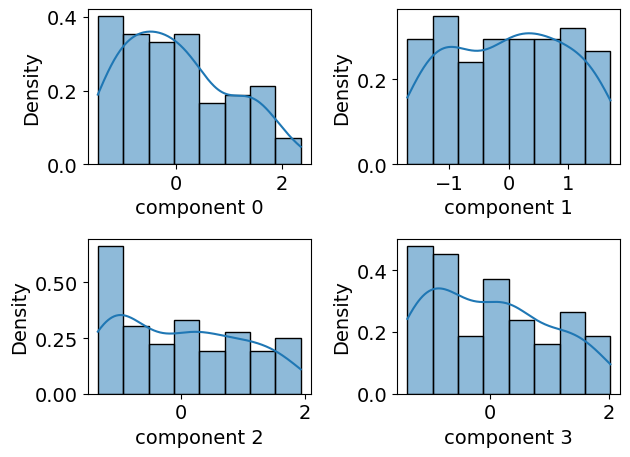

In [33]:
box_kdeplot_samples(tol_samples)


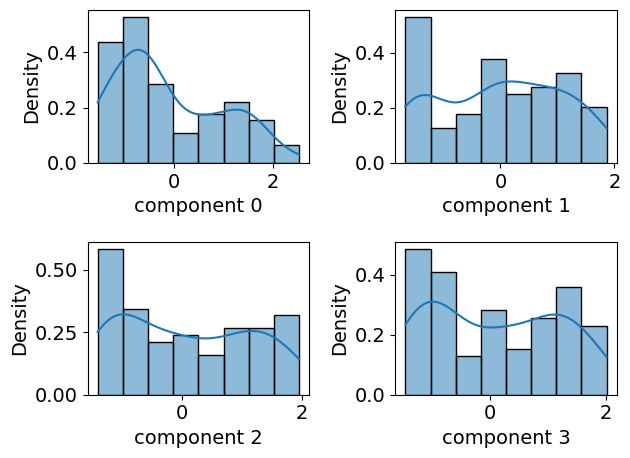

In [34]:
box_kdeplot_samples(tol_samples_LHSMDU)

#### Variances

In [35]:
print("variance data", pd.DataFrame(data_scaled).var(axis='index').to_numpy())
print("variance norm data", np.linalg.norm(pd.DataFrame(data_scaled).var(axis='index').to_numpy()))
print("variance lhs", pd.DataFrame(tol_samples).var(axis='index').to_numpy())
print("variance norm lhs", np.linalg.norm(pd.DataFrame(tol_samples).var(axis='index').to_numpy()))
print("variance lhsmdu", pd.DataFrame(tol_samples_LHSMDU).var(axis='index').to_numpy())
print("variance norm lhsmdu", np.linalg.norm(pd.DataFrame(tol_samples_LHSMDU).var(axis='index').to_numpy()))

variance data [1.01351351 1.01351351 1.01351351 1.01351351]
variance norm data 2.0270270270270285
variance lhs [1.01144065 1.01146293 1.01152878 1.0115782 ]
variance norm lhs 2.023005283548751
variance lhsmdu [1.13968348 1.16636325 1.18450774 1.22093479]
variance norm lhsmdu 2.356485098926371


#### Distribution plots of unscaled reduced data:

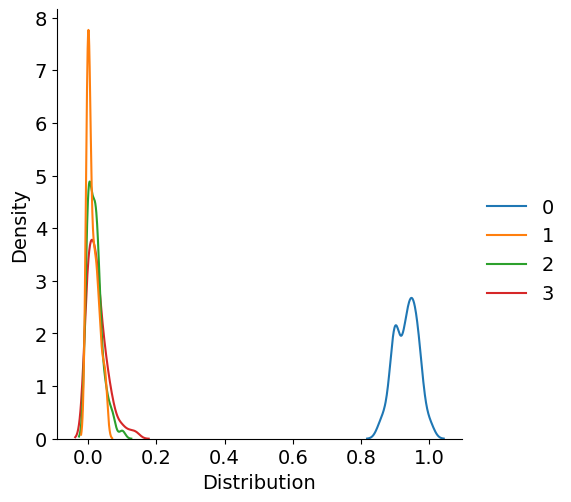

In [36]:
distplot_samples(data_array)

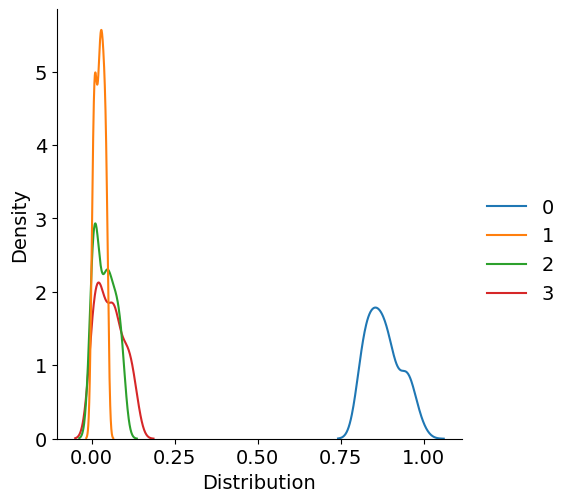

In [37]:
distplot_samples(tol_samples_unscaled)

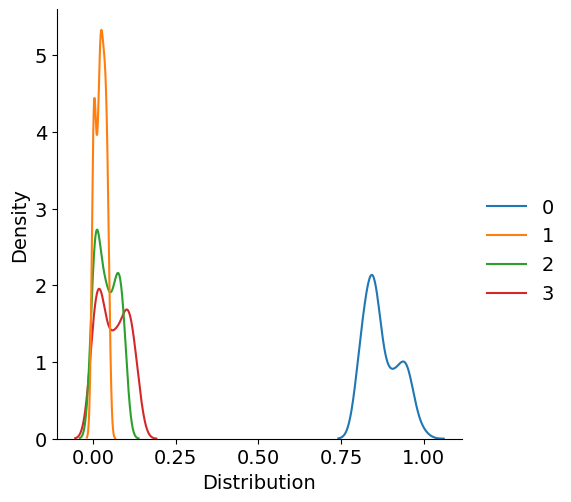

In [38]:
distplot_samples(tol_samples_LHSMDU_unscaled)

#### Distribution subplots of unscaled reduced data

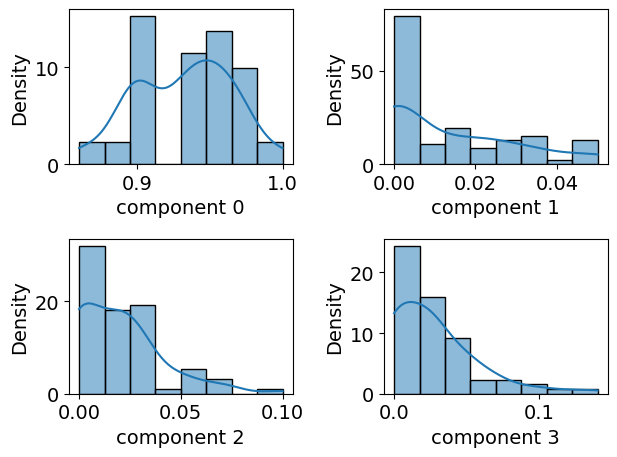

In [39]:
box_kdeplot_samples(data_array)

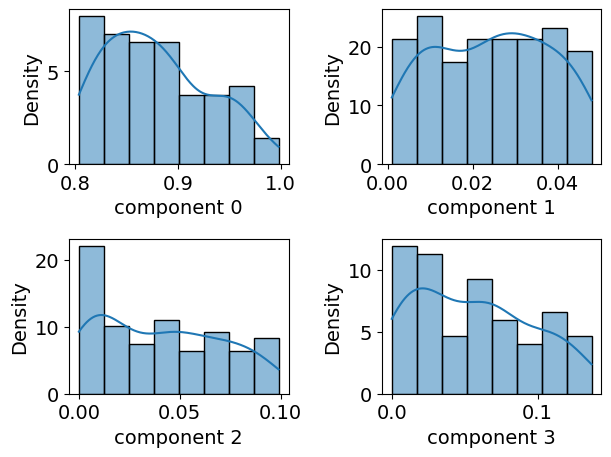

In [40]:
box_kdeplot_samples(tol_samples_unscaled)

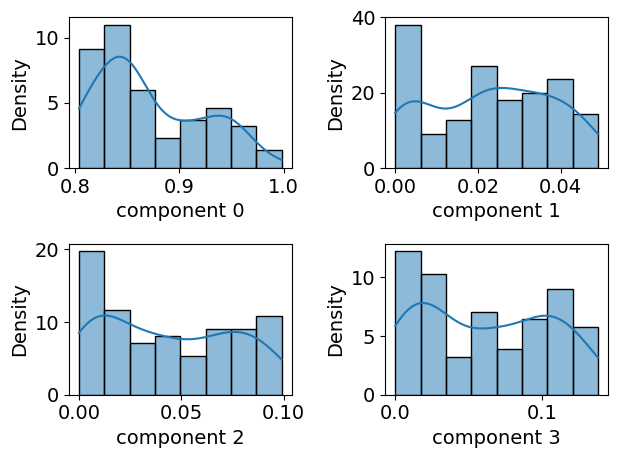

In [41]:
box_kdeplot_samples(tol_samples_LHSMDU_unscaled)

In [42]:
print("variance data", pd.DataFrame(data_array).var(axis='index').to_numpy())
print("variance norm data", np.linalg.norm(pd.DataFrame(data_array).var(axis='index').to_numpy()))
print("variance lhs", pd.DataFrame(tol_samples_unscaled).var(axis='index').to_numpy())
print("variance norm lhs", np.linalg.norm(pd.DataFrame(tol_samples_unscaled).var(axis='index').to_numpy()))
print("variance lhsmdu", pd.DataFrame(tol_samples_LHSMDU_unscaled).var(axis='index').to_numpy())
print("variance norm lhsmdu", np.linalg.norm(pd.DataFrame(tol_samples_LHSMDU_unscaled).var(axis='index').to_numpy()))

variance data [0.00111723 0.00026141 0.0004443  0.00088963]
variance norm data 0.0015183436611557698
variance lhs [0.00256713 0.00019338 0.00091865 0.00162138]
variance norm lhs 0.0031780975231350543
variance lhsmdu [0.00260203 0.00022433 0.00102853 0.00192024]
variance norm lhsmdu 0.0034008911106253536


### **5. Write results to csv files**

In [43]:
tol_samples_unscaled_df = pd.DataFrame(tol_samples_unscaled)
tol_samples_LHSMDU_unscaled_df = pd.DataFrame(tol_samples_LHSMDU_unscaled)

In [44]:
filepath = Path('Outputs/LHS_with_new_permutations_correct_suggestions_allselected_imp_ext_subprobs_improve.csv')  
save_to_csv(filepath, tol_samples_unscaled_df)

filepath2 = Path('Outputs/LHSMDU_with_new_permutations_correct_suggestions_allselected_imp_ext_subprobs_improve.csv')  
save_to_csv(filepath2, tol_samples_LHSMDU_unscaled_df)

In [45]:
all_val_samples_df = pd.DataFrame(all_val_samples)
all_val_samples_mdu_df = pd.DataFrame(all_val_samples_mdu)

In [46]:
filepath3 = Path('Outputs/LHS_with_new_permutations_correct_all_suggestions_allselected_imp_ext_subprobs_improve.csv')  
save_to_csv(filepath3, all_val_samples_df)

filepath4 = Path('Outputs/LHSMDU_with_new_permutations_correct_all_suggestions_allselected_imp_ext_subprobs_improve.csv')  
save_to_csv(filepath4, all_val_samples_mdu_df)

### **6. Show results**

In [47]:
tol_samples_unscaled_df

,0,1,2,3
0,0.871,0.032,0.008,0.089
1,0.934,0.026,0.004,0.036
2,0.881,0.035,0.005,0.079
3,0.906,0.024,0.059,0.011
4,0.885,0.040,0.041,0.034
...,...,...,...,...
83,0.830,0.031,0.089,0.050
84,0.955,0.037,0.006,0.003
85,0.804,0.034,0.090,0.072
86,0.815,0.028,0.093,0.064


In [48]:
tol_samples_LHSMDU_unscaled_df

,0,1,2,3
0,0.824,0.017,0.069,0.090
1,0.889,0.008,0.001,0.101
2,0.851,0.033,0.092,0.024
3,0.842,0.048,0.076,0.034
4,0.914,0.005,0.023,0.058
...,...,...,...,...
85,0.815,0.028,0.093,0.064
86,0.955,0.037,0.006,0.003
87,0.806,0.028,0.098,0.068
88,0.942,0.042,0.001,0.015


#### Normalize such that add up to 1 and perform check

In [49]:
for i in range(len(tol_samples_unscaled_df)):
    if sum(tol_samples_unscaled_df.iloc[i,:])!=1:
        for j in range(len(tol_samples_unscaled_df.columns)):
            tol_samples_unscaled_df.iloc[i,j] = np.around(tol_samples_unscaled_df.iloc[i,j]/sum(tol_samples_unscaled_df.iloc[i,:]),3)

In [50]:
for i in range(len(tol_samples_unscaled_df)):
    if sum(tol_samples_unscaled_df.iloc[i,:])!=1:
        print(i,sum(tol_samples_unscaled_df.iloc[i,:]))

7 1.0000000000000002
21 0.9999999999999999
47 0.9999999999999999
48 1.0000000000000002
53 0.9999999999999999
60 1.0000000000000002


In [51]:
for i in range(len(tol_samples_LHSMDU_unscaled_df)):
    if sum(tol_samples_LHSMDU_unscaled_df.iloc[i,:])!=1:
        for j in range(len(tol_samples_LHSMDU_unscaled_df.columns)):
            tol_samples_LHSMDU_unscaled_df.iloc[i,j] = np.around(tol_samples_LHSMDU_unscaled_df.iloc[i,j]/sum(tol_samples_LHSMDU_unscaled_df.iloc[i,:]),3)

In [52]:
for i in range(len(tol_samples_LHSMDU_unscaled_df)):
    if sum(tol_samples_LHSMDU_unscaled_df.iloc[i,:])!=1:
        print(i,sum(tol_samples_LHSMDU_unscaled_df.iloc[i,:]))

0 0.9999999999999999
14 0.9999999999999999
21 1.0000000000000002
30 1.0000000000000002
35 0.9999999999999999
41 1.0000000000000002


In [53]:
tol_samples_unscaled_df

,0,1,2,3
0,0.871,0.032,0.008,0.089
1,0.934,0.026,0.004,0.036
2,0.881,0.035,0.005,0.079
3,0.906,0.024,0.059,0.011
4,0.885,0.040,0.041,0.034
...,...,...,...,...
83,0.830,0.031,0.089,0.050
84,0.954,0.037,0.006,0.003
85,0.804,0.034,0.090,0.072
86,0.815,0.028,0.093,0.064


In [54]:
tol_samples_LHSMDU_unscaled_df

,0,1,2,3
0,0.824,0.017,0.069,0.090
1,0.890,0.008,0.001,0.101
2,0.851,0.033,0.092,0.024
3,0.842,0.048,0.076,0.034
4,0.914,0.005,0.023,0.058
...,...,...,...,...
85,0.815,0.028,0.093,0.064
86,0.954,0.037,0.006,0.003
87,0.806,0.028,0.098,0.068
88,0.942,0.042,0.001,0.015


#### Test whether all selected samples are feasible

In [55]:
for i in range(len(tol_samples_unscaled)):
    for j in range(dim):
        if tol_samples_unscaled[i,j]<prev_bounds[j][0] or tol_samples_unscaled[i,j]>prev_bounds[j][1]:
            print("not feasible", tol_samples_unscaled[i,:])
print("-------------------")
for i in range(len(tol_samples_LHSMDU_unscaled)):
    for j in range(dim):
        if tol_samples_LHSMDU_unscaled[i,j]<prev_bounds[j][0] or tol_samples_LHSMDU_unscaled[i,j]>prev_bounds[j][1]:
            print("not feasible", tol_samples_LHSMDU_unscaled[i,:])

-------------------


In [56]:
for i in range(len(tol_samples_unscaled)):
    for j in range(dim):
        if tol_samples_unscaled[i,j]<prev_bounds[j][0] or tol_samples_unscaled[i,j]>prev_bounds[j][1]:
            print("not feasible", tol_samples_unscaled[i,:])
print("-------------------")
for i in range(len(tol_samples_LHSMDU_unscaled)):
    for j in range(dim):
        if tol_samples_LHSMDU_unscaled[i,j]<prev_bounds[j][0] or tol_samples_LHSMDU_unscaled[i,j]>prev_bounds[j][1]:
            print("not feasible", tol_samples_LHSMDU_unscaled[i,:])

-------------------
